In [1]:
#%reset
import os
rundir='/space/hall3/sitestore/eccc/crd/ccrn/users/rms101/SCRIPTS/cfc/'
os.chdir(rundir)
import sys
sys.path.append('../PMODS')

import csv
import rms_plots as rpl
import matplotlib.pyplot as plt # for basic plotting
import numpy as np
import nc as nc
import glob
import xarray as xr
plt.style.use('rms_paper')

registering cmaps
registering cmaps


In [2]:
#####################################################
##1. READ ERF AR6 VALUES 
#####################################################

##1a. declare variables###############################

years=np.arange(1955,2006,1);
years2=np.zeros_like(years);nyear=len(years)

erf_ar6={'co2':np.zeros((3,nyear)),
      'ch4':np.zeros((3,nyear)),
      'n2o':np.zeros((3,nyear)),
      'aer':np.zeros((3,nyear)),
      'tot':np.zeros((3,nyear)),
      'o3s':np.zeros((3,nyear)),
      'o3t':np.zeros((3,nyear)),
      'ods':np.zeros((3,nyear))}
colors={'co2':'red',
        'ch4':'purple',
        'n2o':'cyan',
        'aer':'blue',
        'tot':[0.35,0.35,0.35],
        'o3s':'brown',
        'o3t':'green',
        'ods':'orange'}

labels={'co2':'CO$_2$',
        'ch4':'CH$_4$',
        'n2o':'N$_2$O',
        'aer':'AER',
        'tot':'ALL',
        'o3s':'O$_3$,strat',
        'o3t':'O$_3$,trop',
        'ods':'ODS'}
#####################general file (mean)
with open('DATA/IN_ERF_AR6/AR6_ERF_1750-2019.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    line_count=0
    i=0
    for row in lines:
        if line_count==0:
            titles=row
        elif line_count>205 and line_count<257:            
            years2[i]=row[0]
            erf_ar6['co2'][0,i]=float(row[1])
            erf_ar6['ch4'][0,i]=float(row[2])
            erf_ar6['n2o'][0,i]=float(row[3])
            erf_ar6['aer'][0,i]=float(row[15])
            erf_ar6['tot'][0,i]=float(row[19])
            i+=1
        line_count+=1    

    print titles[1],titles[2],titles[3],titles[15],titles[19]

#####################general file (5%)
with open('DATA/IN_ERF_AR6/AR6_ERF_1750-2019_pc05.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    line_count=0
    i=0
    for row in lines:
        if line_count==0:
            titles=row
        elif line_count>205 and line_count<257:            
            years2[i]=row[0]
            erf_ar6['co2'][1,i]=float(row[1])
            erf_ar6['ch4'][1,i]=float(row[2])
            erf_ar6['n2o'][1,i]=float(row[3])
            erf_ar6['aer'][1,i]=float(row[15])
            erf_ar6['tot'][1,i]=float(row[19])
            i+=1
        line_count+=1    

    print titles[1],titles[2],titles[3],titles[15],titles[19]
#####################general file (95%)
with open('DATA/IN_ERF_AR6/AR6_ERF_1750-2019_pc95.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    line_count=0
    i=0
    for row in lines:
        if line_count==0:
            titles=row
        elif line_count>205 and line_count<257:            
            years2[i]=row[0]
            erf_ar6['co2'][2,i]=float(row[1])
            erf_ar6['ch4'][2,i]=float(row[2])
            erf_ar6['n2o'][2,i]=float(row[3])
            erf_ar6['aer'][2,i]=float(row[15])
            erf_ar6['tot'][2,i]=float(row[19])
            i+=1
        line_count+=1    

    print titles[1],titles[2],titles[3],titles[15],titles[19]

#####################o3 file (mean)
with open('DATA/IN_ERF_AR6/o3_erf.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    line_count=0
    i=0
    for row in lines:
        if line_count==0:
            titles=row
        elif line_count>205 and line_count<257:            
            years2[i]=row[0]
            erf_ar6['o3t'][0,i]=float(row[2])
            erf_ar6['o3s'][0,i]=float(row[3])
            i+=1
        line_count+=1    

    print titles[2],titles[3]

#####################ods (mean)
with open('DATA/IN_ERF_AR6/AR6_ERF_minorGHGs_1750-2019.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    line_count=0
    i=0
    for row in lines:
        if line_count==0:
            titles=row
        elif line_count>205 and line_count<257:            
            years2[i]=row[0]
            erf_ar6['ods'][0,i]=float(row[50])
            i+=1
        line_count+=1    

    print titles[50]
#####################ODS uncertainty
erf_ar6['ods'][1,:]=erf_ar6['ods'][0,:]*0.81
erf_ar6['ods'][2,:]=erf_ar6['ods'][0,:]*1.19



#####################remove 1955 value
for forcing in (sorted(erf_ar6.keys())):
    erf_ar6[forcing][0,:]=erf_ar6[forcing][0,:]-erf_ar6[forcing][0,0]
    erf_ar6[forcing][1,:]=erf_ar6[forcing][1,:]-erf_ar6[forcing][1,0]
    erf_ar6[forcing][2,:]=erf_ar6[forcing][2,:]-erf_ar6[forcing][2,0]

derf_ar6={}; 
for forcing in sorted(erf_ar6.keys()):
    derf_ar6[forcing]=np.zeros((3))
    for i in range(3):
        derf_ar6[forcing][i]=np.mean(erf_ar6[forcing][i,-10::],axis=0)-np.mean(erf_ar6[forcing][i,0:10],axis=0)
        
    
    






co2 ch4 n2o aerosol total
co2 ch4 n2o aerosol total
co2 ch4 n2o aerosol total
o3_trop o3_strat
ODS_total


In [3]:
#####################################################
##2. READ ERF and calculate CanESM5  VALUES
#####################################################
nens_erf=3

erf_canesm5={'tot':np.zeros((nens_erf,nyear)),
      'aer':np.zeros((nens_erf,nyear)),
      'co2':np.zeros((nens_erf,nyear)),
      'ods':np.zeros((nens_erf,nyear))}

#### ALL FORCING
erf_canesm5_ctrl=nc.getvar('DATA/IN_ERF_CanESM5/sc_pic-ctrlspin2_1950_2049_rtd074.nc','NET_TOA_ENERGY_GLOBAL_BALT__WpM2______________ANN_00001')[4:55]
erf_canesm5_allrun=np.zeros((3,nyear))
erf_canesm5_allrun[0,:]=nc.getvar('DATA/IN_ERF_CanESM5/sc_p2-pic-hall01a_185001_201412_rtd074.nc','BALT')[105:155+1]
erf_canesm5_allrun[1,:]=nc.getvar('DATA/IN_ERF_CanESM5/sc_p2-pic-hall02_185001_201412_rtd074.nc','BALT')[105:155+1]
erf_canesm5_allrun[2,:]=nc.getvar('DATA/IN_ERF_CanESM5/sc_p2-pic-hall03_185001_201412_rtd074.nc','BALT')[105:155+1]

erf_canesm5['tot']=erf_canesm5_allrun-erf_canesm5_ctrl     # subtract PI (to account for drift?)  
erf_canesm5['tot'][:,0]=erf_canesm5['tot'][:,0]-erf_canesm5['tot'][:,0] #remove 1955 value

#### fixed forcings

for i in range(nens_erf):
    erf_canesm5['co2'][i,:]=erf_canesm5_allrun[i,:]-nc.getvar('DATA/IN_ERF_CanESM5/sc_jcl-tods-fco2-0'+str(i+1)+'_195501_201412_rtd074.nc','BALT')[0:51]
    erf_canesm5['aer'][i,:]=erf_canesm5_allrun[i,:]-nc.getvar('DATA/IN_ERF_CanESM5/sc_jcl-tods-faer-0'+str(i+1)+'_195501_201412_rtd074.nc','BALT')[0:51]


erf_canesm5['ods'][0,:]=erf_canesm5_allrun[i,:]-nc.getvar('DATA/IN_ERF_CanESM5/sc_jcl-tods-fods-01r_195501_201412_rtd074.nc','BALT')[0:51]
for i in range(1,nens_erf):
    erf_canesm5['ods'][i,:]=erf_canesm5_allrun[i,:]-nc.getvar('DATA/IN_ERF_CanESM5/sc_jcl-tods-fods-0'+str(i+1)+'_195501_201412_rtd074.nc','BALT')[0:51]

#####################delta ERF
#derf_canesm5={}; 
#for forcing in sorted(erf_canesm5.keys()):
#    derf_canesm5[forcing]=np.zeros((nens_erf))
#    for i in range(nens_erf):
#        derf_canesm5[forcing][i]=np.mean(erf_canesm5[forcing][i,-10::],axis=0)-np.mean(erf_canesm5[forcing][i,0:10],axis=0)

derf_canesm5={};
for forcing in sorted(erf_canesm5.keys()):
    derf_canesm5[forcing]=np.zeros((nens_erf,nyear))*np.NaN
    for y in range(9,nyear):
        for i in range(nens_erf):
            derf_canesm5[forcing][i,y]=np.mean(erf_canesm5[forcing][i,y-9:y+1],axis=0)-np.mean(erf_canesm5[forcing][i,0:10],axis=0)


        
        
        
#####################Canesm5 Timeslice values
derf_canesm5_timeslice_single={'tot':1.49,'co2':0.956,'aer':-0.385,'ods':0.462}
derf_canesm5_timeslice_fix={'tot':1.49,'co2':0.961,'aer':-0.396,'ods':0.535}



In [5]:
#####################################################
##3. READ CanESM5 SAT (coupled runs, from CFC_TAS_arc_gm.ipynb)
#####################################################
datadir='/space/hall3/sitestore/eccc/crd/ccrn/users/rms101/DATA/cfc_post'
varnm='tas'
ystart=1955;ystop=2005;nyear=ystop+1-ystart
ystartb=1955;ystopb=1964
files_gsat={'historical':[],'hist-noCFC':[],'hist-noCFC-noO3':[],'hist-noaerosol':[],'hist-noCO2':[]} 

gsat_canesm5={}   

for forcing in files_gsat.keys():
    #print forcing
    files_gsat[forcing]=[]
    os.chdir('{}/DATA_{}_canesm5_past_{}'.format(datadir,varnm,forcing))
    #make file lists
    for i in range(1,21): 
        files_gsat[forcing].extend(glob.glob('gmam*_'+forcing+'_*r'+str(i)+'i1p2f1*'))
    #declare variables
    gsat_canesm5[forcing]=np.zeros((20,nyear))*np.nan  
    #read data
    for i,file in enumerate(files_gsat[forcing]):
        df=xr.open_dataset(file)
        gsat_canesm5[forcing][i,:]=(df.sel(time=slice(str(ystart),str(ystop))).tas.data).squeeze() 

#####################delta gsat
dgsat_canesm5={};
for forcing in sorted(gsat_canesm5.keys()):
    dgsat_canesm5[forcing]=np.zeros((20,nyear))*np.NaN
    for y in range(9,nyear):
        for i in range(20):
            dgsat_canesm5[forcing][i,y]=np.mean(gsat_canesm5[forcing][i,y-9:y+1],axis=0)-np.mean(gsat_canesm5[forcing][i,0:10],axis=0)


os.chdir(rundir)

/fs/homeu1/eccc/crd/ords/ccrn/rms101/.conda/envs/py2_rms_v2/lib/python2.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in divide
/fs/homeu1/eccc/crd/ords/ccrn/rms101/.conda/envs/py2_rms_v2/lib/python2.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in divide


1.4402973190140456


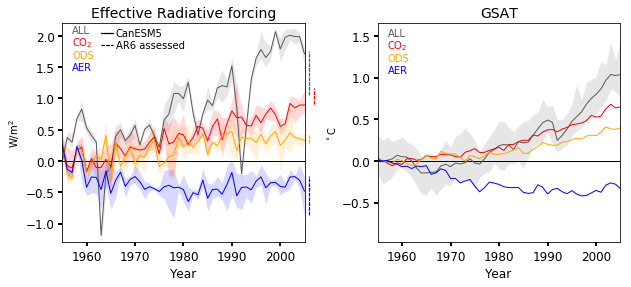

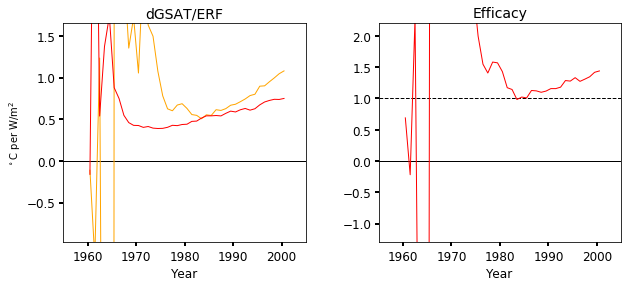

In [7]:
#####################################################
##4. PLOTS
#####################################################
############### FIG1: TOT,CO2,AER,ODS (ERF+GSAT)

fig1, axs = plt.subplots(1,2, figsize=(10,8)); 
fig1.subplots_adjust(bottom=0.5,hspace=0.05,wspace=0.3)

#############ERF

ax=axs[0]
ax.set_xlim([1955, 2005.1]) 
ax.set_ylim([-1.3, 2.2]) 
ax.set_xlabel('Year',size='large')
ax.axhline(y=0,color="black",linewidth=1)
ax.set_ylabel('W/m$^2$')
ax.plot([1963,1965.5],[2.05,2.05], color='k',clip_on=False,linestyle='-',linewidth=1.25) #ar6 uncertainty
ax.text(1966,2.0,'CanESM5')
ax.plot([1963,1965.5],[1.85,1.85], color='k',clip_on=False,linestyle=(0,(3,0.8)),linewidth=1.25) #cmip6 uncertainty
ax.text(1966,1.8,'AR6 assessed')

for i,forcing in enumerate (['tot','co2','ods','aer']):
    # range
    ax.plot(years,np.mean(erf_canesm5[forcing],axis=0),linewidth=1, color=colors[forcing]) #canesm5 timeseries
    ax.fill_between(years,np.min(erf_canesm5[forcing],axis=0), np.max(erf_canesm5[forcing],axis=0),color=colors[forcing], alpha=0.15, linewidth=0)
    
    if forcing=='co2': offset=1; 
    else: offset=0
    ax.plot([2006+offset,2006+offset],[erf_ar6[forcing][1,-1],erf_ar6[forcing][2,-1]], color=colors[forcing],clip_on=False,linestyle=(0,(3,0.8)),linewidth=1.25) #cmip6 uncertainty0
    ax.text(1957,2.05-i*0.2,labels[forcing],color=colors[forcing]) 
rpl.add_title(ax,'Effective Radiative forcing')

#############GSAT
labelsdif={'historical':'ALL',
          'hist-noCFC':'ODS', 
          'hist-noCFC-noO3':'ODSO3',
          'hist-noaerosol':'AER',
          'hist-noCO2':'CO$_2$'}
colors_gsat={'historical':[0.35,0.35,0.35],
        'hist-noCFC':'orange',
        'hist-noCFC-noO3':'brown',
        'hist-noaerosol':'blue',
        'hist-noCO2':'red'        
       }    
ax=axs[1]
ax.set_xlim([1955, 2005]) 
ax.set_ylim([-1.3*0.75, 2.2*0.75])
ax.set_xlabel('Year',size='large')
ax.axhline(y=0,color="black",linewidth=1)
ax.set_ylabel('$^\circ$C')

##historical
x=gsat_canesm5['historical']-np.mean(gsat_canesm5['historical'][:,0:10])
ax.plot(years,np.mean(x,axis=0),linewidth=1, color=colors_gsat['historical'])
ax.text(1957,1.5,'ALL',color=colors_gsat['historical'])
ax.fill_between(years,np.min(x,axis=0),np.max(x,axis=0),color=colors_gsat['historical'], alpha=0.15, linewidth=0)
                
##all-fixed
for i,forcing in enumerate(['hist-noCO2','hist-noCFC','hist-noaerosol']):
    #plot timeseries
    x=gsat_canesm5['historical']-gsat_canesm5[forcing]    
    ax.plot(years,np.mean(x,axis=0),linewidth=1, color=colors_gsat[forcing])
    #ax.fill_between(years,np.min(x,axis=0),np.max(x,axis=0),color=colors_gsat[forcing], alpha=0.15, linewidth=0)
    ax.text(1957,1.35-i*0.15,labelsdif[forcing],color=colors_gsat[forcing])    
rpl.add_title(ax,'GSAT')    
rpl.mysavefig(fig1,'PLOTS/fig1_ERF+GSAT_CanESM5+AR6range.png')
    
    

############### FIG12 TOT,CO2,AER,ODS (Efficacy)    
fig1, axs = plt.subplots(1,2, figsize=(10,8)); 
fig1.subplots_adjust(bottom=0.5,hspace=0.05,wspace=0.3)

#############dGSAT
ax=axs[0]
ax.set_xlim([1955, 2005]) 
ax.set_ylim([-1.3*0.75, 2.2*0.75])
ax.set_xlabel('Year',size='large')
ax.axhline(y=0,color="black",linewidth=1)
ax.set_ylabel('$^\circ$C per W/m$^2$')

dgsat_derf_ods=np.mean(dgsat_canesm5['historical']-dgsat_canesm5['hist-noCFC'],axis=0)/np.mean(derf_canesm5['ods'],axis=0)
ax.plot(years-4.5,dgsat_derf_ods,linewidth=1, color=colors_gsat['hist-noCFC'])

dgsat_derf_co2=np.mean(dgsat_canesm5['historical']-dgsat_canesm5['hist-noCO2'],axis=0)/np.mean(derf_canesm5['co2'],axis=0)
ax.plot(years-4.5,dgsat_derf_co2,linewidth=1, color=colors_gsat['hist-noCO2'])

rpl.add_title(ax,'dGSAT/ERF')        
    
#############dGSAT
ax=axs[1]
ax.set_xlim([1955, 2005]) 
ax.set_ylim([-1.3, 2.2])
ax.set_xlabel('Year',size='large')
ax.axhline(y=0,color="black",linewidth=1)
ax.axhline(y=1,color="black",linewidth=1,linestyle='--')

ax.plot(years-4.5,dgsat_derf_ods/dgsat_derf_co2,linewidth=1, color=colors_gsat['hist-noCO2'])

rpl.add_title(ax,'Efficacy')        
rpl.mysavefig(fig1,'PLOTS/fig1b_efficacy.png')
    
    
print dgsat_derf_ods[-1]/dgsat_derf_co2[-1]    
    
##title,save

        

    
    
    
    

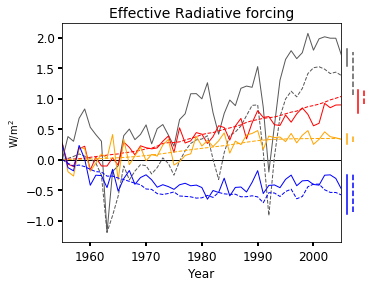

In [10]:
############### FIG2: ERF TOT,CO2,AER,ODS (CanESM5+CMIP6 means)

fig1, axs = plt.subplots(1,1, figsize=(5,8)); 
fig1.subplots_adjust(bottom=0.5,hspace=0.1,wspace=0.15)
ax=axs
ax.set_xlim([1955, 2005]) 
ax.set_xlabel('Year',size='large')
ax.axhline(y=0,color="black",linewidth=1)
ax.set_ylabel('W/m$^2$')
for i,forcing in enumerate (['tot','co2','ods','aer']):
    ax.plot(years,np.mean(erf_canesm5[forcing],axis=0),linewidth=1, color=colors[forcing]) #canesm5 timeseries
    ax.plot(years,erf_ar6[forcing][0,:],linewidth=1, color=colors[forcing],linestyle='--') #cmip6 timeseries
    if forcing=='co2': offset=2; 
    else: offset=0
    ax.plot([2006+offset,2006+offset],[np.min(erf_canesm5[forcing][:,-1]),np.max(erf_canesm5[forcing][:,-1])], color=colors[forcing],clip_on=False) #canesm5range
    ax.plot([2006+offset+1,2006+offset+1],[erf_ar6[forcing][1,-1],erf_ar6[forcing][2,-1]], color=colors[forcing],linestyle='--',clip_on=False) #cmip6 uncertainty
##title,save
rpl.add_title(ax,'Effective Radiative forcing')
rpl.mysavefig(fig1,'PLOTS/fig1_alt_ERF_CanESM5+AR6.png')





    

0 tot
1 co2
2 aer
3 ods
0 aer
1 ch4
2 co2
3 n2o
4 o3s
5 o3t
6 ods
7 tot


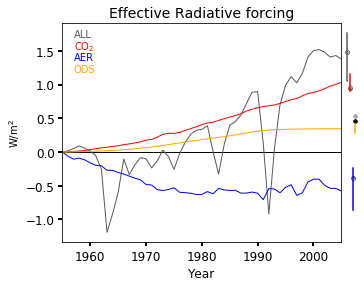

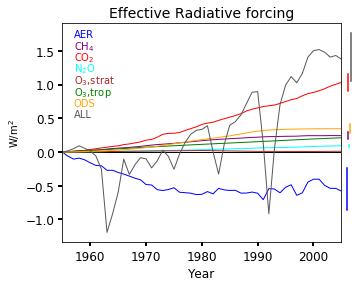

In [12]:

############### FIG2: TOT,CO2,AER,ODS (CMIP6 with CanESM5 timeslice numbers)


############### Setup fig
fig1, axs = plt.subplots(1,1, figsize=(5,8)); 
fig1.subplots_adjust(bottom=0.5,hspace=0.1,wspace=0.15)

############### All forcings (mean)
ax=axs

ax.set_xlim([1955, 2005]) 
ax.set_xlabel('Year',size='large')
ax.axhline(y=0,color="black",linewidth=1)
ax.set_ylabel('W/m$^2$')


for i,forcing in enumerate (['tot','co2','aer','ods']):
    print i,forcing
    ax.plot(years,erf_ar6[forcing][0,:],linewidth=1, color=colors[forcing])
    ax.plot([2006+i*0.5,2006+i*0.5],[erf_ar6[forcing][1,-1],erf_ar6[forcing][2,-1]], color=colors[forcing],clip_on=False)
    ax.scatter([2006+i*0.5,2006+i*0.5],[derf_canesm5_timeslice_single[forcing],derf_canesm5_timeslice_single[forcing]], color='k',clip_on=False,s=10)
    ax.scatter([2006+i*0.5,2006+i*0.5],[derf_canesm5_timeslice_fix[forcing],derf_canesm5_timeslice_fix[forcing]], color=[0.65,0.65,0.65],clip_on=False,s=10)
    
    ax.text(1957,1.7-i*0.17,labels[forcing],color=colors[forcing])




##title,save
rpl.add_title(ax,'Effective Radiative forcing')
rpl.mysavefig(fig1,'PLOTS/fig1_old_ERF_AR6+CanESM5timeslice.png')


############### ALL FORCINGS (CMIP6)

############### Setup fig
fig1, axs = plt.subplots(1,1, figsize=(5,8)); 
fig1.subplots_adjust(bottom=0.5,hspace=0.1,wspace=0.15)
ax=axs
ax.set_xlim([1955, 2005]) 
ax.set_xlabel('Year',size='large')
ax.axhline(y=0,color="black",linewidth=1)
ax.set_ylabel('W/m$^2$')


for i,forcing in enumerate (sorted(erf_ar6.keys())):
    print i,forcing
    ax.plot(years,erf_ar6[forcing][0,:],linewidth=1, color=colors[forcing])
    ax.plot([2006+i*0.1,2006+i*0.1],[erf_ar6[forcing][1,-1],erf_ar6[forcing][2,-1]], color=colors[forcing],clip_on=False)
    ax.text(1957,1.7-i*0.17,labels[forcing],color=colors[forcing])
##title,save
rpl.add_title(ax,'Effective Radiative forcing')
rpl.mysavefig(fig1,'PLOTS/Figs1_ERF_AR6_all.png')

In [18]:
dT_ods=np.mean(dgsat_canesm5['historical'][:,-1]-dgsat_canesm5['hist-noCFC'][:,-1])
dT_co2=np.mean(dgsat_canesm5['historical'][:,-1]-dgsat_canesm5['hist-noCO2'][:,-1])
F_ods=np.mean(derf_canesm5['ods'][:,-1])
F_co2=np.mean(derf_canesm5['co2'][:,-1])

print dT_ods/dT_co2
print F_ods/F_co2


efficacy_ods= (dT_ods/dT_co2) * (F_co2/F_ods) 
print 'ANd...... The big number is:' +str(efficacy_ods)
print ('')
print ('')
print ('ERFs 2005-1955 decades')
print ('ODS CanESM5: transient: '+"%6.3f"%(np.mean(derf_canesm5['ods'][:,-1],axis=0)))
print ('ODS CMIP6: central: '+"%6.3f"%(derf_ar6['ods'][0])+'  min:'+"%6.3f"%(derf_ar6['ods'][1]) + '  max:'+"%6.3f"%(derf_ar6['ods'][2]))


print ('')
print ('CO2 CanESM5: transient: '+"%6.3f"%(np.mean(derf_canesm5['co2'][:,-1],axis=0)))
print ('CO2 CMIP6: central: '+"%6.3f"%(derf_ar6['co2'][0])+'  min:'+"%6.3f"%(derf_ar6['co2'][1]) + '  max:'+"%6.3f"%(derf_ar6['co2'][2]))
print ('')

print ('ODS/CO2 CanESM5: transient: '+"%6.3f"%(np.mean(derf_canesm5['ods'][:,-1],axis=0)/
                                               np.mean(derf_canesm5['co2'][:,-1],axis=0)))

print ('ODS/CO2 CMIP6: central: '+"%6.3f"%(derf_ar6['ods'][0]/derf_ar6['co2'][0])+
                         '  min:'+"%6.3f"%(derf_ar6['ods'][1]/derf_ar6['co2'][1])+   
                         '  max:'+"%6.3f"%(derf_ar6['ods'][2]/derf_ar6['co2'][2]))





print ('')
print ('')


print ('ERFs 2005-1955')
print ('ODS CanESM5: transient: '+"%6.3f"%(np.mean(erf_canesm5['ods'][:,-1])))
print ('ODS CanESM5: fixed: '+"%6.3f"%(derf_canesm5_timeslice_fix['ods'])+'  single: '+"%6.3f"%(derf_canesm5_timeslice_single['ods']))
print ('ODS CMIP6: central: '+"%6.3f"%(erf_ar6['ods'][0,-1])+'  min:'+"%6.3f"%(erf_ar6['ods'][1,-1]) + '  max:'+"%6.3f"%(erf_ar6['ods'][2,-1]))


print ('')
print ('CO2 CanESM5: transient: '+"%6.3f"%(np.mean(erf_canesm5['co2'][:,-1])))
print ('CO2 CanESM5: fixed: '+"%6.3f"%(derf_canesm5_timeslice_fix['co2'])+'  single: '+"%6.3f"%(derf_canesm5_timeslice_single['co2']))
print ('CO2 CMIP6: central: '+"%6.3f"%(erf_ar6['co2'][0,-1])+'  min:'+"%6.3f"%(erf_ar6['co2'][1,-1]) + '  max:'+"%6.3f"%(erf_ar6['co2'][2,-1]))
print ('')

print ('ODS/CO2 CanESM5: transient: '+"%6.3f"%(np.mean(erf_canesm5['ods'][:,-1])/
                                               np.mean(erf_canesm5['co2'][:,-1])))

print ('ODS/CO2 CanESM5: fixed: '+"%6.3f"%(derf_canesm5_timeslice_fix['ods']/derf_canesm5_timeslice_fix['co2'])+'  single: '+"%6.3f"%(derf_canesm5_timeslice_single['ods']/derf_canesm5_timeslice_single['co2']))
print ('ODS/CO2 CMIP6: central: '+"%6.3f"%(erf_ar6['ods'][0,-1]/erf_ar6['co2'][0,-1])+'  min:'+"%6.3f"%(erf_ar6['ods'][1,-1]/erf_ar6['co2'][2,-1]) + '  max:'+"%6.4f"%(erf_ar6['ods'][2,-1]/erf_ar6['co2'][1,-1]))



0.6153059842946126
0.4272076162134495
ANd...... The big number is:1.4402973190140453


ERFs 2005-1955 decades
ODS CanESM5: transient:  0.321
ODS CMIP6: central:  0.334  min: 0.270  max: 0.397

CO2 CanESM5: transient:  0.751
CO2 CMIP6: central:  0.867  min: 0.763  max: 0.970

ODS/CO2 CanESM5: transient:  0.427
ODS/CO2 CMIP6: central:  0.385  min: 0.354  max: 0.409


ERFs 2005-1955
ODS CanESM5: transient:  0.329
ODS CanESM5: fixed:  0.535  single:  0.462
ODS CMIP6: central:  0.346  min: 0.280  max: 0.412

CO2 CanESM5: transient:  0.896
CO2 CanESM5: fixed:  0.961  single:  0.956
CO2 CMIP6: central:  1.036  min: 0.912  max: 1.159

ODS/CO2 CanESM5: transient:  0.367
ODS/CO2 CanESM5: fixed:  0.557  single:  0.483
ODS/CO2 CMIP6: central:  0.334  min: 0.242  max:0.4520
